In [ ]:

from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)



In [18]:
base1 = """

l L0 10 0 n0                           #input laser 10W

tem L0 0 0 1 0                         #tem modes m=10
tem L0 1 0 1 0 
tem L0 2 0 1 0 
tem L0 3 0 1 0 
tem L0 4 0 1 0 
tem L0 5 0 1 0 
tem L0 6 0 1 0 
tem L0 7 0 1 0
tem L0 8 0 1 0
tem L0 9 0 1 0 
tem L0 10 0 1 0

s s1 1 n0 n5                            #space between l and itm

m itmx0 0 1 0 n5 n6                     #ITM surface 1
s itmx_l 0.035 1.44963 n6 n7            #thickness of mirror
m2 itmx 0.99 50u 0 n7 n8                #ITM surface 2

s s2 9.1 n8 n9                          #cavity length

m2 etmx 0.998 50u 0 n9 n10              #ETM surface 2
s etmx_l 0.035 1.44963 n10 n11          #thickness of mirror
m etmx0 0 1 0 n11 n12                   #ETM surface 1

attr etmx Rcx 34                        #roc of mirror
attr etmx Rcy 34

xaxis etmx Rcx lin 10 90 7000
func g = 1-(9.1/$x1)


put etmx Rcy $x1


ad order0 0 0 0 n12                     #ad detectors
ad order1 1 0 0 n12
ad order2 2 0 0 n12
ad order3 3 0 0 n12
ad order4 4 0 0 n12
ad order5 5 0 0 n12
ad order6 6 0 0 n12
ad order7 7 0 0 n12
ad order8 8 0 0 n12
ad order9 9 0 0 n12
ad order10 10 0 0 n12


cav FP itmx n8 etmx n9
cp FP x finesse
maxtem 10
phase 2

#noplot Rc2
"""

In [22]:
basekat = finesse.kat() 
basekat.verbose = 1
basekat.parse(base1)

out = basekat.run()
out.info()
#out.plot(['FP_x_w'])

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 1 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 2 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 3 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 4 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 5 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 6 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 7 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 8 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 9 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 10 0 1 0` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
R

100% | ETA:  0:00:00 | Calculating                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 910.937 seconds

--- Output info ---

Run date and time: 2021-08-04 16:24:34.660044
Detectors used: FP_x_finesse, g, order0, order1, order10, order2, order3, order4, order5, order6, order7, order8, order9

One xaxis used: ['xaxis etmx Rcx lin 10 90 7000', 'put etmx Rcy $x1']
order0       : min = 6.990352663437530e-01 max = 6.990352663437530e-01
order1       : min = 2.207944798675050e-03 max = 6.623570081085230e-03
order2       : min = 2.106246147353380e-03 max = 3.679875364798500e-03
order3       : min = 2.106246043604450e-03 max = 6.747671797313390e-01
order4       : min = 2.106246044050680e-03 max = 6.843409566368760e-01
order5       : min = 2.106247660323050e-03 max = 6.967144916548480e-01
order6       : min = 2.106246977345180e-03 max = 6.990352663437530e-01
order7       : min = 2.106246204338990e-03 max = 6.982138755595070e-01
order8       : min = 2.106246136251200e-03 max = 6.989700242129010e-01
ord

(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 <a list of 7 Text major ticklabel objects>)

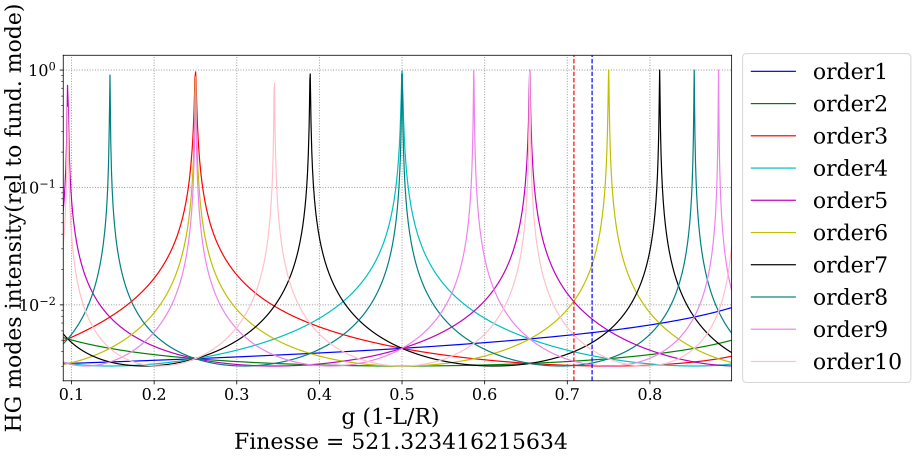

In [23]:


y=[]
x= out['g']
colors = ['b','g','r','c','m','y','k','teal','violet','pink','olive','orange','plum','peru']
plt.figure(figsize=(12,6))


#append all output detectors in an array
for i in range(0,10,1):
    y.append(out['order'+str(i+1)]/out['order0'])


#plot all outputs
for k in range(0,10,1):
    plt.semilogy(x,y[k],antialiased=False,label='order'+str(k),c=colors[k])  
    
 
#label and other stuff
plt.grid(linewidth=1)
plt.legend(["order1","order2","order3","order4","order5","order6","order7","order8","order9","order10"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("g (1-L/R)  \n Finesse = "+str(out['FP_x_finesse'][1]))
plt.ylabel("HG modes intensity(rel to fund. mode)",verticalalignment='center')
plt.axvline(x = 0.708, color = 'r', linestyle = 'dashed')
plt.axvline(x = 0.73, color = 'b', linestyle = 'dashed')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
